# Analyzing Patterns and Trends in the UFC

![Daniel Cormier vs Jon Jones](https://sportshub.cbsistatic.com/i/r/2016/06/22/581136a1-eda8-40bf-8bdc-57efce664316/resize/750x422/684274c7571763a29508e6e4e5ae8eb3/jones-cormier.jpg "Daniel Cormier (right) fighting Jon Jones (left)")


# Introduction

##### The goal of this project is to analyze UFC fight data from 2010 to 2024 to explore statistical patterns that occur in UFC fights, gain insight into how the UFC books their matches, and identify potential trends that can reveal more about what contributes to winning.

#### Questions we will be exploring:
- In terms of attributes other than weight, how do opposing fighters typically compare to each other?
- What are the most common types of fights?
- What are the most common ways a fight can finish?
- How important are fighting stance matchups when it comes to winning fights?
- 
- Does a more aggressive wrestling/ground game really improve striking? If so, how much?

##### Dataset:
- "Ultimate UFC Dataset" on Kaggle
- Author: mdabbert
- Link: https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset
- Includes fights from 03/21/2010 to 12/07/2024

## Import Libraries and Dataset

In [1337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest

In [1338]:
all_fights = pd.read_csv('ufc-master.csv')
all_fights

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1339]:
all_fights.shape

(6528, 118)

In [1340]:
print(list(all_fights.columns))

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

In [1341]:
all_fights.dtypes

RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BlueDecOdds         float64
RSubOdds            float64
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
Length: 118, dtype: object

In [1342]:
all_fights.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,...,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,...,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
std,277.225783,253.117416,85.891109,137.689177,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,...,4.307369,4.352773,1.007887,360.383418,250.750088,325.940028,601.826547,671.106177,426.563458,465.014634
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-255.000000,-150.000000,39.215700,66.666700,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,...,5.000000,5.000000,1.000000,299.000000,170.000000,222.000000,439.750000,600.000000,225.000000,310.000000
50%,-150.000000,130.000000,66.666700,130.000000,3.000000,0.000000,0.000000,0.000000,9.280000,0.460000,...,8.000000,10.000000,3.000000,900.000000,250.000000,350.000000,750.000000,1000.000000,420.000000,525.000000
75%,130.000000,215.000000,130.000000,215.000000,3.000000,1.000000,1.000000,0.000000,32.666700,0.513000,...,12.000000,13.500000,3.000000,900.000000,400.000000,550.000000,1200.000000,1450.000000,700.000000,875.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


## Data Preparation
- Identify any duplicates
- Removing fights with missing or abnormal data
- Removing features that will not be used in analysis

In [1343]:
# Locate duplicates
all_fights.loc[all_fights.duplicated()]

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds


In [1344]:
# Uniting women's and men's weight classes for readability
all_fights['WeightClass'] = all_fights['WeightClass'].str.replace("Women's ", "", regex=False)

In [1345]:
# Creating separate dataframe for analysis, removing columns that won't be used in analysis/prediction.

analysis_df = all_fights[['RedFighter', 'BlueFighter', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
                          'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 
                          'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgTDPct', 'BlueAvgTDLanded', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgTDPct', 'RedAvgTDLanded',
                          'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 
                          'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
                          'Finish', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs']
]

In [1346]:
# For colummns with null values, find ratio of null entries to total entries
def print_null_ratios(df):
    for col in df.columns:
        total_nulls = df[col].isnull().sum()
        ratio = total_nulls / df.shape[0]
        if total_nulls > 0:
            print(f"{col:<25} {total_nulls:<15} {ratio:<8.3f}")


In [1347]:
'''# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(analysis_df)
'''


'# Number of null values in dataset of all fights\nprint(f"{\'Column:\':<25} {\'Total Nulls:\':<15} {\'Ratio:\':<8}")\nprint_null_ratios(analysis_df)\n'

## 3. Exploratory Data Analysis

### Dataset At A Glance

In [1348]:
# Looking at win percentage for fighters in the red corner
red_win_percentage = (analysis_df['Winner'] == 'Red').sum() / analysis_df.shape[0]
red_title_win_percentage = ((analysis_df['TitleBout']) & (analysis_df['Winner'] == 'Red')).sum() / analysis_df['TitleBout'].sum()

print(f"Total Fights: {analysis_df.shape[0]}")
print(f"Total Title Fights: {analysis_df['TitleBout'].sum()}")

print(f"Red Win Percentage: {red_win_percentage:.3f}")
print(f"Red Win Percentage (Title Fights): {red_title_win_percentage:.3f}")

Total Fights: 6528
Total Title Fights: 302
Red Win Percentage: 0.580
Red Win Percentage (Title Fights): 0.662


### Observation
- In UFC fights, the fighter with either the better record or the defending champion is assigned to the red corner, resulting in a historically better record for fighters in the red corner.

In [1349]:
# Combine red fighter's age and blue fighter's age into a single series for plotting
all_ages = pd.concat([analysis_df['RedAge'], analysis_df['BlueAge']], ignore_index=True)
print(f"Average Fighter Age: {all_ages.mean():.2f}")

Average Fighter Age: 30.08


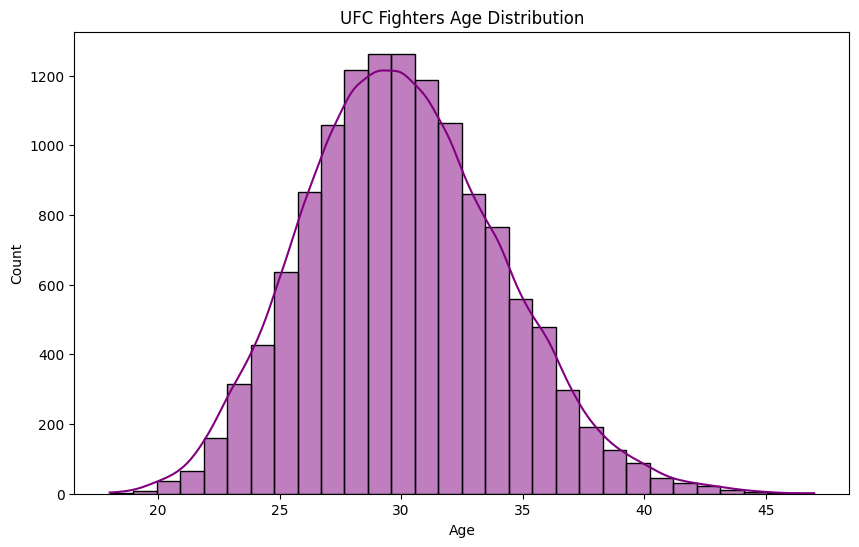

In [1350]:
# Plot the age distribution
plt.figure(figsize=(10,6))
sns.histplot(all_ages, bins=30, kde=True, color='purple')
plt.title('UFC Fighters Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

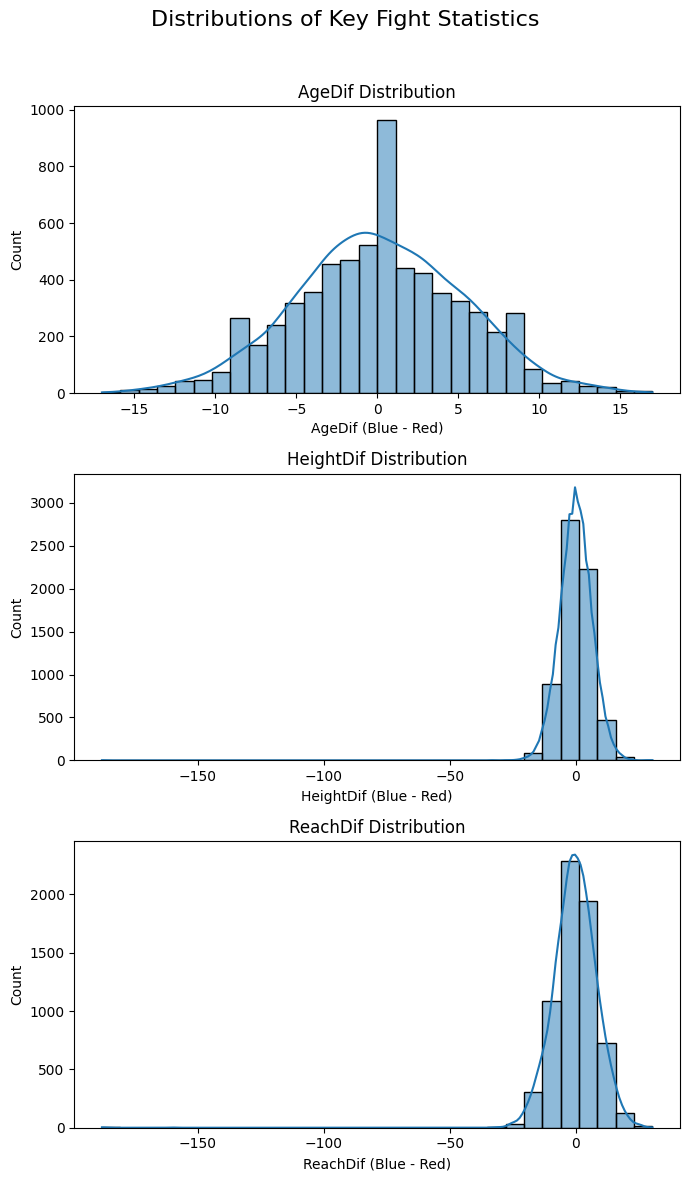

In [1351]:
key_columns = ['AgeDif', 'HeightDif', 'ReachDif'] 
fig, axes = plt.subplots(3, 1, figsize=(7, 12)) 
fig.suptitle('Distributions of Key Fight Statistics', fontsize=16)

for ax, col in zip(axes.flatten(), key_columns):
    sns.histplot(analysis_df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(f'{col} (Blue - Red)')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

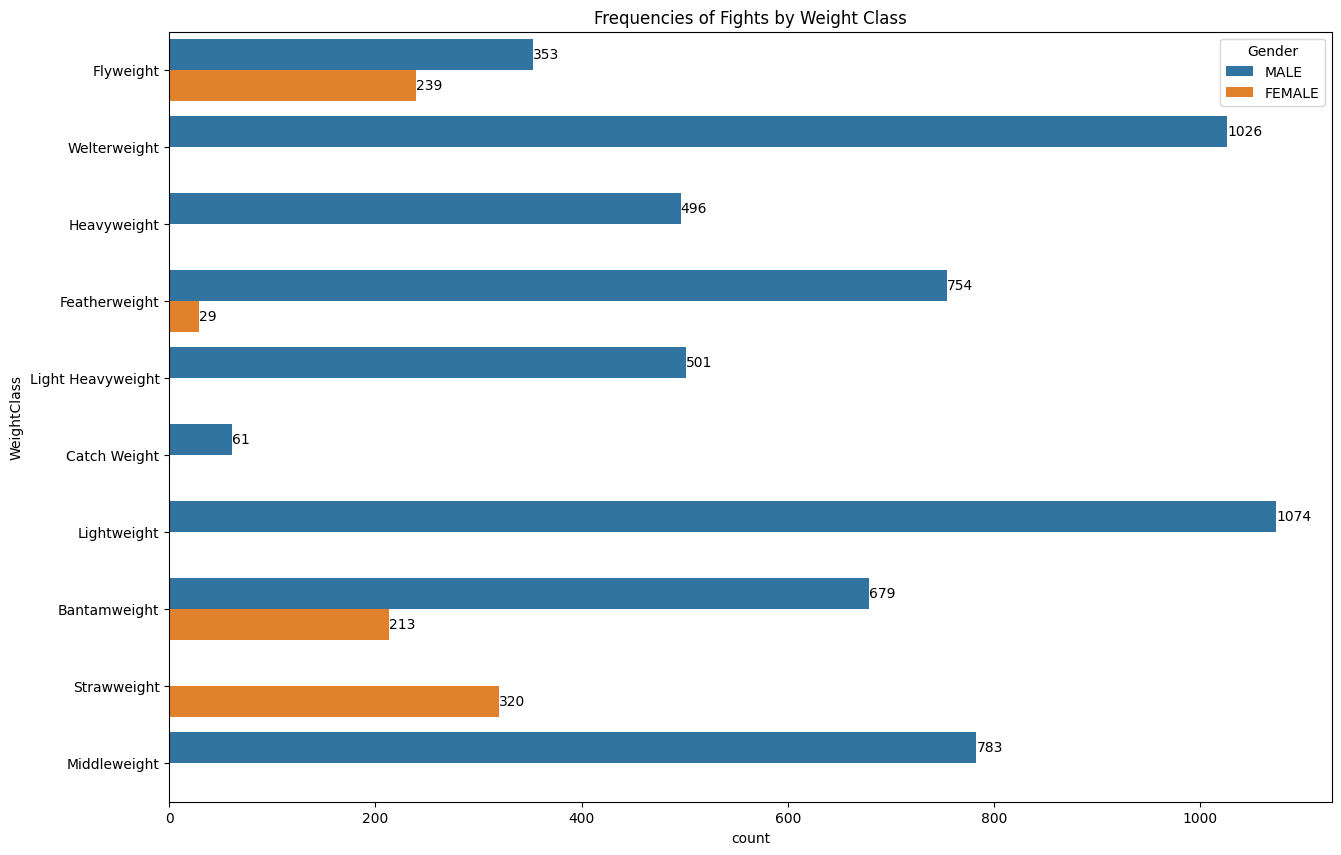

In [1352]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y='WeightClass', hue='Gender', data=analysis_df)
plt.title("Frequencies of Fights by Weight Class")

# Annotate each bar with its count
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Observations:

- Lightweight and Welterweight emerge as the divisions with the most frequent fights, showcasing the significant amount of depth and talent these divisions have had historically.
- Besides Catch Weight, the Men's Flyweight division lags significantly behind the other men's divisions, largely because it is a newer division (Created in 2012), and the UFC does not promote it as much as the heavier divisions.
- The Women's Featherweight division's talent pool was extremely small largely because it was a division only promoted around a few names such as Amanda Nunes and Cris Cyborg. After Nunes retired, the UFC discontinued the division.

/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_25794/1404267902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_methods.index, y=win_methods.values, palette='viridis')


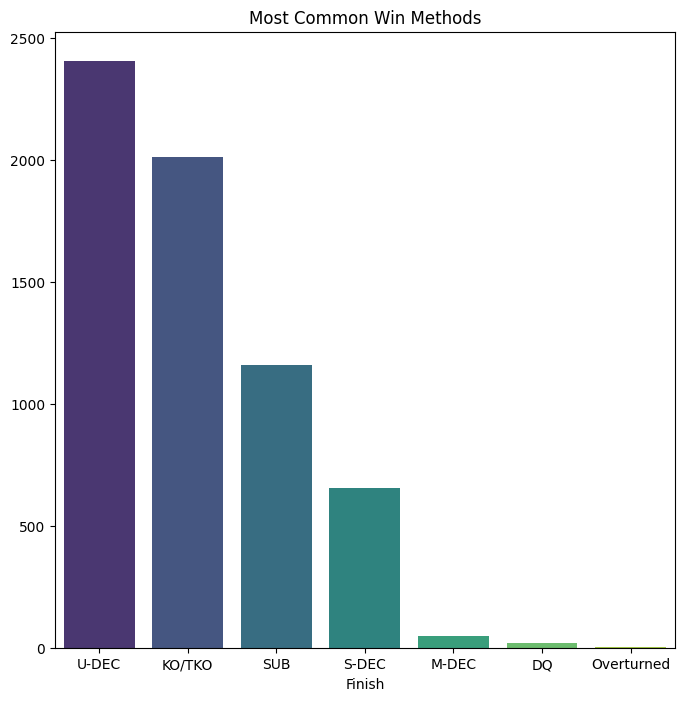

In [1353]:
# Looking at all ways a fight can end
win_methods = analysis_df['Finish'].value_counts()
plt.figure(figsize=(8, 8))
sns.barplot(x=win_methods.index, y=win_methods.values, palette='viridis')
plt.title('Most Common Win Methods')
plt.ylabel('')
plt.show()


In [1354]:
# Removing fights that ended in a disqualification or were overturned
analysis_df = analysis_df[~analysis_df['Finish'].isin(['DQ', 'Overturned'])]

## Investigating the Potential Advantages of Southpaw and Switch Stances
- In combat sports, it's been known that fighters in a Southpaw stance against a fighter in an Orthodox stance have an advantage due to foot positioning and a more awkward angle favoring the Southpaw fighter in certain exchanges. Additionally, Southpaw fighters are a minority, so opposing fighters are less likely to train against Southpaws as much as Orthodox fighters
- Is this advantage prevalent at the highest level of MMA?
- With the rise of fighters being able to fight out of both stances (Switch Stance), do they have an advantage over Non-Switch fighters at the highest level?


In [1355]:
# Checking all unique stance values in dataset
print(f"Unique BlueStance Values: {analysis_df['BlueStance'].unique()}")
print(f"Unique RedStance Values: {analysis_df['RedStance'].unique()}")

Unique BlueStance Values: ['Orthodox' 'Southpaw' 'Switch' nan 'Switch ' 'Open Stance']
Unique RedStance Values: ['Orthodox' 'Southpaw' 'Switch' 'Open Stance']


In [1356]:
# Cleaning up stance data
analysis_df['BlueStance'] = analysis_df['BlueStance'].str.strip()
analysis_df['RedStance'] = analysis_df['RedStance'].str.strip()
analysis_df = analysis_df.dropna(subset=['BlueStance'])
analysis_df = analysis_df[
    (analysis_df['BlueStance'] != 'Open Stance') &
    (analysis_df['RedStance'] != 'Open Stance')
]
print(f"Unique BlueStance Values: {analysis_df['BlueStance'].unique()}")
print(f"Unique RedStance Values: {analysis_df['RedStance'].unique()}")

Unique BlueStance Values: ['Orthodox' 'Southpaw' 'Switch']
Unique RedStance Values: ['Orthodox' 'Southpaw' 'Switch']


Text(0.5, 1.0, 'Most Common Fighting Stance Among Winners')

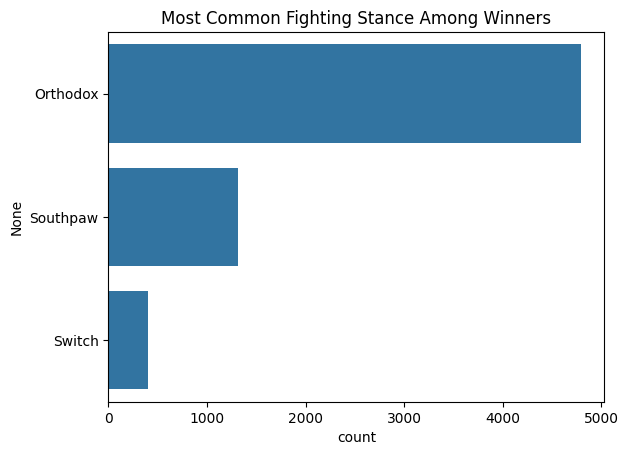

In [1357]:
winner_stance = np.where(
    analysis_df['Winner'] == 'Red',
    analysis_df['RedStance'],
    analysis_df['BlueStance']
)
winner_stance = pd.Series(winner_stance, index=analysis_df.index)

sns.countplot(y=winner_stance)
plt.title("Most Common Fighting Stance Among Winners")

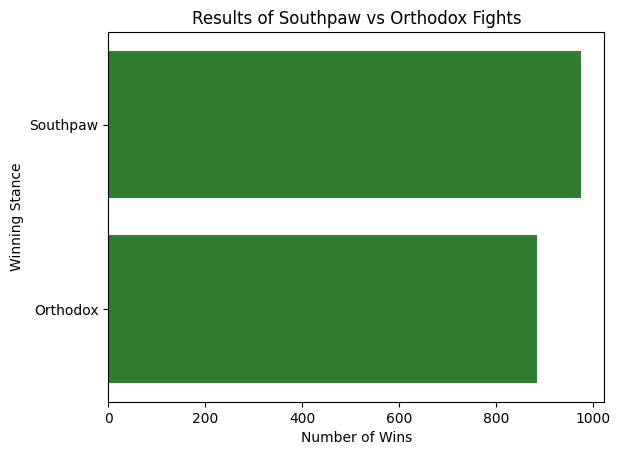

In [1358]:
southpaw_fights = analysis_df[
    ((analysis_df['RedStance'] == 'Southpaw') &
    (analysis_df['BlueStance'] == 'Orthodox')) |
    ((analysis_df['RedStance'] == 'Orthodox') &
    (analysis_df['BlueStance'] == 'Southpaw'))
]
winner_stances = np.where(
    southpaw_fights['Winner'] == 'Red',
    southpaw_fights['RedStance'],
    southpaw_fights['BlueStance']
)

winner_stances = pd.Series(winner_stances, index=southpaw_fights.index)

ax = sns.countplot(y=winner_stances, color='forestgreen')
ax.set_xlabel("Number of Wins")
ax.set_ylabel("Winning Stance")
plt.title("Results of Southpaw vs Orthodox Fights")
plt.show()

In [1359]:
# Count number of Southpaw wins in Southpaw vs Orthodox fights
southpaw_wins = np.sum(
    np.where(
        southpaw_fights['Winner'] == 'Red',
        southpaw_fights['RedStance'],
        southpaw_fights['BlueStance']
    ) == 'Southpaw'
)

total_southpaw_fights = len(southpaw_fights)

# Null hypothesis: Southpaw wins 50% of the time
result = binomtest(southpaw_wins, total_southpaw_fights, p=0.5, alternative='two-sided')
print(f"Southpaw wins: {southpaw_wins} / {total_southpaw_fights} ({(southpaw_wins/total_southpaw_fights)*100:.2f}%)")
print(f"p-value: {result.pvalue:.4f}")

if result.pvalue < 0.05:
    print("The advantage is statistically significant (p < 0.05).")
else:
    print("No statistically significant advantage (p >= 0.05).")

Southpaw wins: 974 / 1858 (52.42%)
p-value: 0.0389
The advantage is statistically significant (p < 0.05).


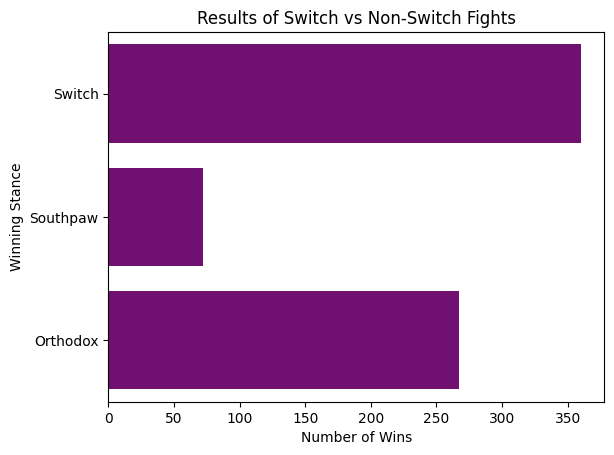

In [1360]:
switch_fights = analysis_df[
    (((analysis_df['RedStance'] == 'Switch') & (analysis_df['BlueStance'] != 'Switch')) | 
     ((analysis_df['BlueStance'] == 'Switch') & (analysis_df['RedStance'] != 'Switch')))
]

switch_winner_stances = np.where(
    switch_fights['Winner'] == 'Red',
    switch_fights['RedStance'],
    switch_fights['BlueStance']
)

switch_winner_stances = pd.Series(switch_winner_stances, index=switch_fights.index)

ax = sns.countplot(y=switch_winner_stances, color='purple')
ax.set_xlabel("Number of Wins")
ax.set_ylabel("Winning Stance")
plt.title("Results of Switch vs Non-Switch Fights")
plt.show()


In [1361]:
# Count number of Switch wins in Switch vs Non-Switch fights
switch_wins = np.sum(
    np.where(
        switch_fights['Winner'] == 'Red',
        switch_fights['RedStance'],
        switch_fights['BlueStance']
    ) == 'Switch'
)

total_switch_fights = len(switch_fights)

# Null hypothesis: Switch wins 50% of the time
result = binomtest(switch_wins, total_switch_fights, p=0.5, alternative='two-sided')
print(f"Switch wins: {switch_wins} / {total_switch_fights} ({(switch_wins/total_switch_fights)*100:.2f}%)")
print(f"p-value: {result.pvalue:.4f}")

if result.pvalue < 0.05:
    print("The advantage is statistically significant (p < 0.05).")
else:
    print("No statistically significant advantage (p >= 0.05).")

Switch wins: 360 / 699 (51.50%)
p-value: 0.4494
No statistically significant advantage (p >= 0.05).


## Exploring Knockouts
- When do knockouts occur?
- How do weight classes affect knockouts?

In [1362]:
finish_percentage = (analysis_df['Finish'].isin(['KO/TKO', 'SUB'])).sum() / analysis_df.shape[0]
ko_percentage = (analysis_df['Finish'] == 'KO/TKO').sum() / (analysis_df['Finish'].isin(['KO/TKO', 'SUB'])).sum()

print(f"Overall Finish Percentage (KO/TKO or SUB): {(finish_percentage):.3f}")
print(f"Percentage of Finishes that are KO/TKO: {(ko_percentage):.3f}")

Overall Finish Percentage (KO/TKO or SUB): 0.486
Percentage of Finishes that are KO/TKO: 0.634


Text(0.5, 1.0, 'Number of Fights Ending in KO/TKO by Finish Round')

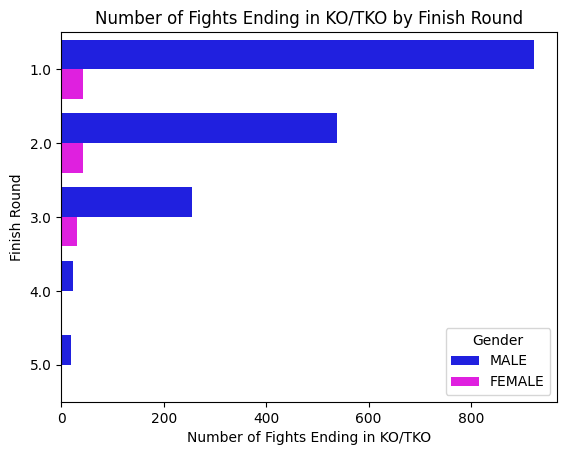

In [1363]:
# All fights ending in KO/TKO
ko_fights = analysis_df[analysis_df['Finish'] == 'KO/TKO']

sns.countplot(
    data=ko_fights,
    y='FinishRound',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}
)

plt.xlabel('Number of Fights Ending in KO/TKO')
plt.ylabel('Finish Round')
plt.title('Number of Fights Ending in KO/TKO by Finish Round')

In [1364]:
# Create a separate dataframe excluding the Catch Weight class
analysis_df_no_catch = analysis_df[analysis_df['WeightClass'] != 'Catch Weight']

/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_25794/2431834451.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ko_fights = analysis_df_no_catch[analysis_df['Finish'] == 'KO/TKO']


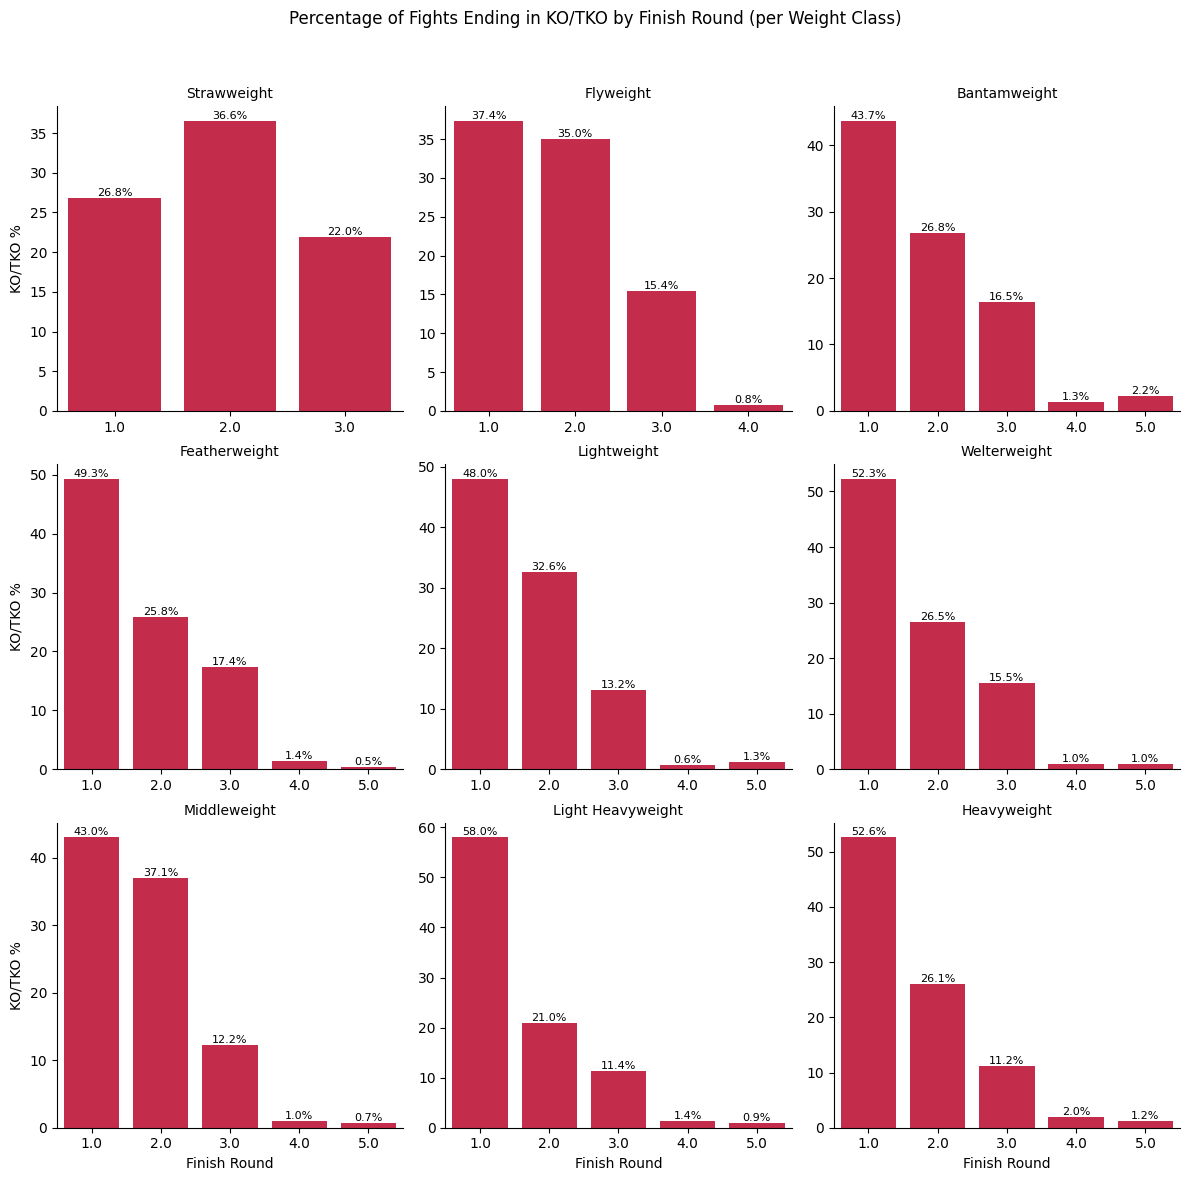

In [1365]:
# Calculate percentage of KO/TKO by finish round for each weight class
ko_fights = analysis_df_no_catch[analysis_df['Finish'] == 'KO/TKO']

# Count KO/TKO per round per weight class
ko_counts = ko_fights.groupby(['WeightClass', 'FinishRound']).size().reset_index(name='KO_Count')

# Total KO/TKO per weight class
total_ko_per_class = ko_fights.groupby('WeightClass').size().reset_index(name='Total_KO')

ko_counts = ko_counts.merge(total_ko_per_class, on='WeightClass')
ko_counts['Percent'] = ko_counts['KO_Count'] / ko_counts['Total_KO'] * 100

class_order = ['Strawweight', 'Flyweight', 'Bantamweight', 'Featherweight', 
               'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']

g = sns.FacetGrid(ko_counts, col='WeightClass', col_order=class_order, col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='FinishRound', y='Percent', color='crimson')
g.set_axis_labels("Finish Round", "KO/TKO %")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Percentage of Fights Ending in KO/TKO by Finish Round (per Weight Class)")
plt.show()

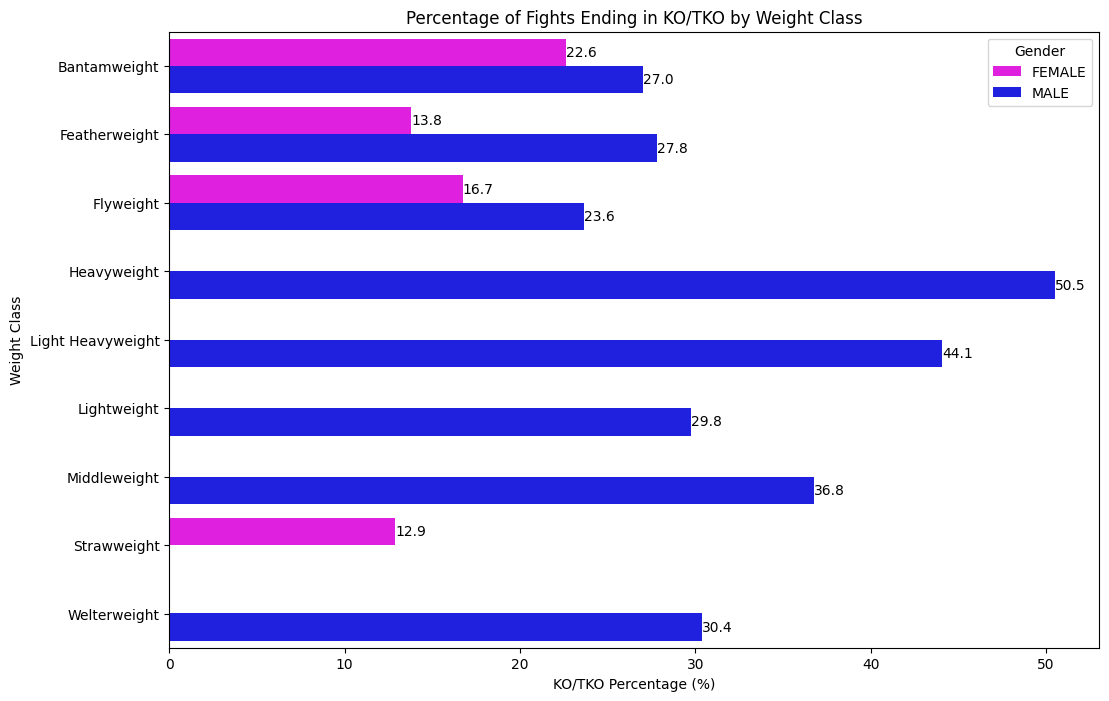

In [1366]:
# Calculate total fights per weight class and gender
total_fights_per_class_gender = analysis_df_no_catch.groupby(['WeightClass', 'Gender']).size()

# Calculate KO/TKO fights per weight class and gender
ko_fights_per_class_gender = analysis_df_no_catch[analysis_df_no_catch['Finish'] == 'KO/TKO'].groupby(['WeightClass', 'Gender']).size()
# Calculate percentage
percent_ko_gender = (ko_fights_per_class_gender / total_fights_per_class_gender * 100).fillna(0).reset_index(name='KO/TKO %')

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=percent_ko_gender,
    y='WeightClass',
    x='KO/TKO %',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}

)
plt.xlabel('KO/TKO Percentage (%)')
plt.ylabel('Weight Class')
plt.title('Percentage of Fights Ending in KO/TKO by Weight Class')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

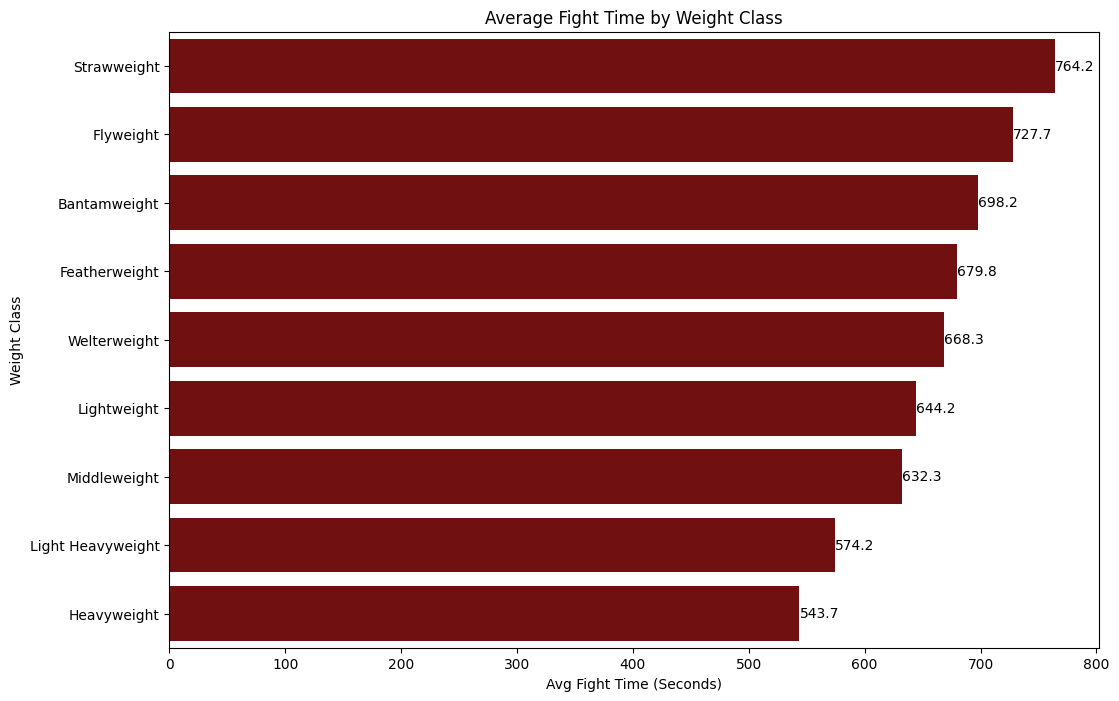

In [1367]:
fight_class_times = analysis_df_no_catch
fight_class_times = fight_class_times[['WeightClass', 'TotalFightTimeSecs']]
fight_class_times = fight_class_times.groupby(['WeightClass']).mean()

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=fight_class_times,
    y='WeightClass',
    x='TotalFightTimeSecs', color='maroon',
    order=fight_class_times.sort_values('TotalFightTimeSecs', ascending=False).index
)

plt.xlabel('Avg Fight Time (Seconds)')
plt.ylabel('Weight Class')
plt.title('Average Fight Time by Weight Class')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()


## Exploring Submissions

Text(0.5, 1.0, 'Number of Fights Ending in Submission by Finish Round')

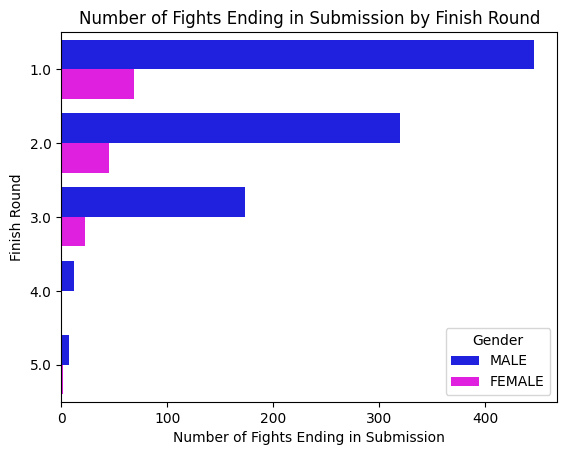

In [1368]:
# All fights ending in Submission
sub_fights = analysis_df[analysis_df['Finish'] == 'SUB']

sns.countplot(
    data=sub_fights,
    y='FinishRound',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}
)
plt.xlabel('Number of Fights Ending in Submission')
plt.ylabel('Finish Round')
plt.title('Number of Fights Ending in Submission by Finish Round')

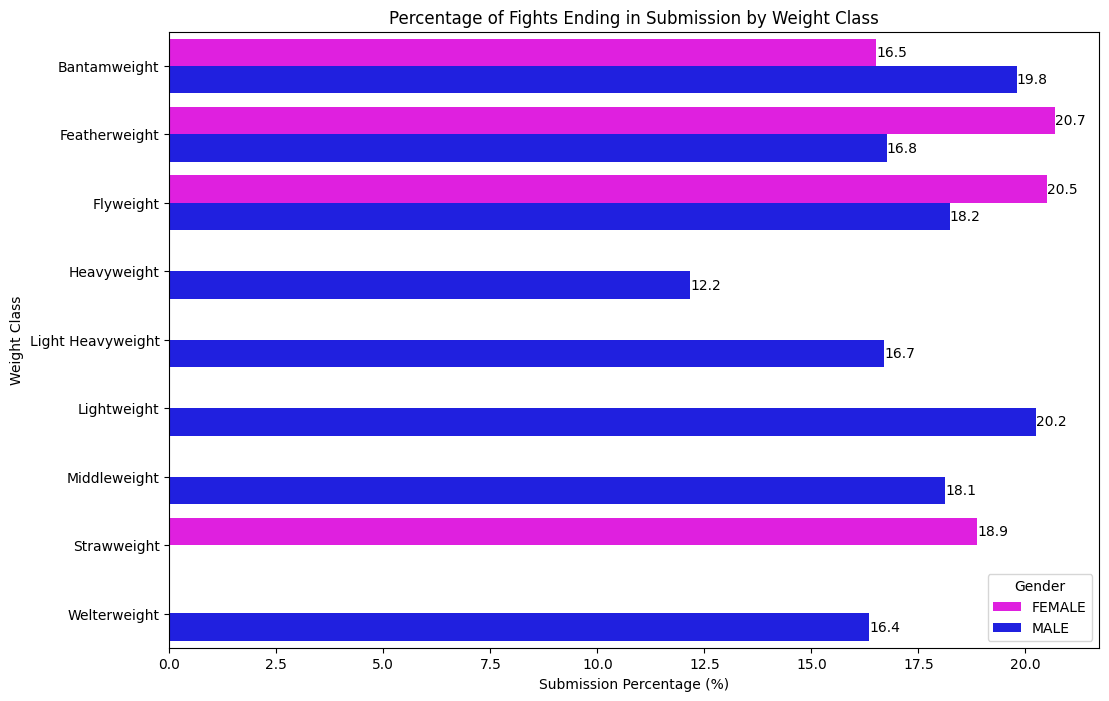

In [1369]:
# Calculate submission fights per weight class and gender
sub_fights_per_class_gender = analysis_df_no_catch[analysis_df_no_catch['Finish'] == 'SUB'].groupby(['WeightClass', 'Gender']).size()

percent_sub_gender = (sub_fights_per_class_gender / total_fights_per_class_gender * 100).fillna(0).reset_index(name='SUB %')

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=percent_sub_gender,
    y='WeightClass',
    x='SUB %',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}

)
plt.xlabel('Submission Percentage (%)')
plt.ylabel('Weight Class')
plt.title('Percentage of Fights Ending in Submission by Weight Class')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

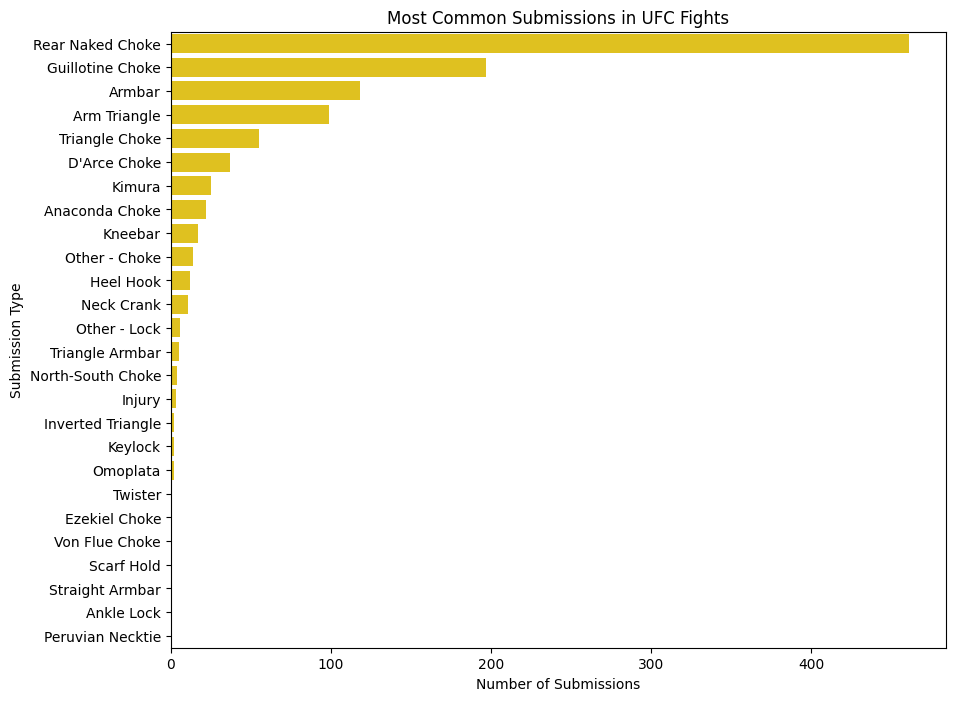

In [1370]:
all_finishes = all_fights['FinishDetails'].dropna()
exclude = ['Elbows', 'Punches', 'Punch', 'Kick', 'Elbow', 'Knee', 'Knees', 'Flying Knee', 'Slam', 'Spinning Back Fist', 'Spinning Back Elbow', 'Kicks', 'Spinning Back Kick']
all_subs = all_finishes[~all_finishes.isin(exclude)]

plt.figure(figsize=(10, 8))
sns.countplot(y=all_subs, color='gold', order=all_subs.value_counts().index)
plt.title('Most Common Submissions in UFC Fights')
plt.xlabel('Number of Submissions')
plt.ylabel('Submission Type')
plt.show()

In [1371]:
# Removing fights with abnormal stats
analysis_df = analysis_df[~(
    (analysis_df['RedAvgSigStrLanded'] > 8.66) |
    (analysis_df['BlueAvgSigStrLanded'] > 8.66))]

analysis_df['RedSigStrAttPerMin'] = analysis_df['RedAvgSigStrLanded'] / analysis_df['RedAvgSigStrPct']
analysis_df['BlueSigStrAttPerMin'] = analysis_df['BlueAvgSigStrLanded'] / analysis_df['BlueAvgSigStrPct']

red_df = analysis_df[['RedFighter', 'RedSigStrAttPerMin', 'RedAvgSigStrPct', 'RedAvgTDLanded', 'RedAvgSigStrLanded']]
blue_df = analysis_df[['BlueFighter', 'BlueSigStrAttPerMin', 'BlueAvgSigStrPct', 'BlueAvgTDLanded', 'BlueAvgSigStrLanded' ]]
red_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDLanded', 'AvgSigStrLanded']
blue_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDLanded', 'AvgSigStrLanded']
fighters_df = pd.concat([red_df, blue_df], ignore_index=True)
fighters_df = fighters_df[fighters_df['TDLanded'] > 0]
fighters_df['TD Landed Per Min'] = fighters_df['TDLanded'] / 15



In [1372]:
mean = fighters_df['SigStrAttPerMin'].mean()
std = fighters_df['SigStrAttPerMin'].std()
anomalies = fighters_df['SigStrAttPerMin'][np.abs((fighters_df['SigStrAttPerMin'] - mean) / std) > 2]

In [1373]:
fighters_df[fighters_df['SigStrAttPerMin'].isin(anomalies)]

,Fighter,SigStrAttPerMin,SigStrPct,TDLanded,AvgSigStrLanded,TD Landed Per Min
91,Daniel Rodriguez,15.306122,0.49,0.5900,7.5000,0.039333
127,Daniel Zellhuber,15.650000,0.40,0.1800,6.2600,0.012000
164,Casey O'Neill,15.173077,0.52,1.4500,7.8900,0.096667
222,Joshua Van,15.830189,0.53,1.6200,8.3900,0.108000
277,Sean Strickland,14.309524,0.42,0.7800,6.0100,0.052000
...,...,...,...,...,...,...
5634,Gabriel Silva,1.060000,0.50,1.0000,0.5300,0.066667
5635,Jin Soo Son,14.166667,0.36,1.5000,5.1000,0.100000
5636,Felipe Colares,2.690476,0.42,2.0000,1.1300,0.133333
5954,Chris Tuchscherer,43.859474,0.19,0.3333,8.3333,0.022220


In [1374]:
fighters_df = fighters_df[~fighters_df['SigStrAttPerMin'].isin(anomalies)] 

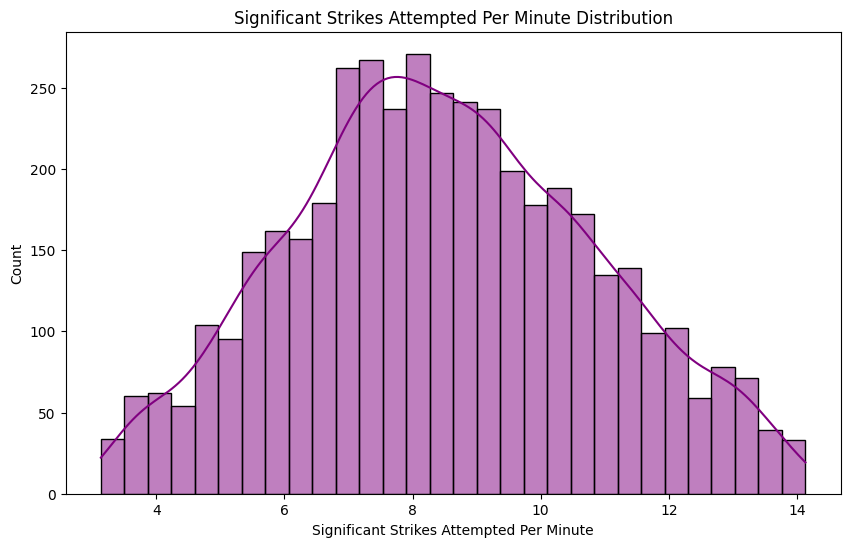

In [1375]:
plt.figure(figsize=(10,6))
sns.histplot(fighters_df['SigStrAttPerMin'], bins=30, kde=True, color='purple')
plt.title('Significant Strikes Attempted Per Minute Distribution')
plt.xlabel('Significant Strikes Attempted Per Minute')
plt.ylabel('Count')
plt.show()

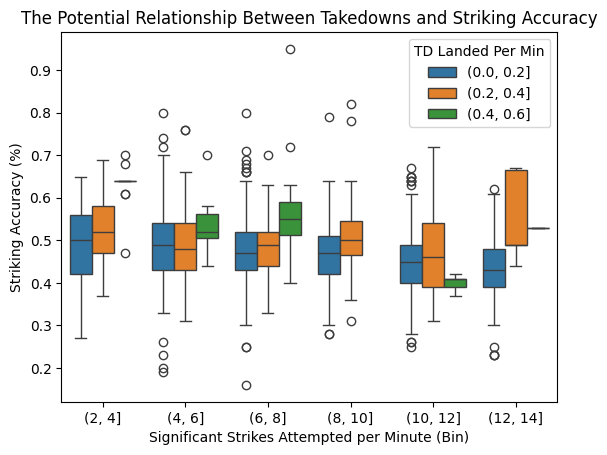

<Figure size 2000x3000 with 0 Axes>

In [1376]:

# Bin by SigStrAttPerMin
fighters_df['AttBin'] = pd.cut(fighters_df['SigStrAttPerMin'], bins=[2, 4, 6, 8, 10, 12, 14])

# Compare striking accuracy by takedown groups within bins
sns.boxplot(x='AttBin', y='SigStrPct', hue=pd.cut(fighters_df['TD Landed Per Min'], bins=[0, 0.2, 0.4, 0.6]), data=fighters_df)
plt.title('The Potential Relationship Between Takedowns and Striking Accuracy')
plt.xlabel('Significant Strikes Attempted per Minute (Bin)')
plt.ylabel('Striking Accuracy (%)')
plt.figure(figsize=(20,30))
plt.show()
